In [64]:
#https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer
#cool code for a button to hide code 
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tabulate
import statistical_tools as s_tools
#plotting with seaborn
#https://cmdlinetips.com/2019/02/how-to-make-histogram-in-python-with-pandas-and-seaborn/

test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

*So I'm looking to practice my data exploration skills but also formulating clean hypothesis that can be tested. I'm doing this while working through statistical-thinking on DataCamp. I want to play around with these techniques when I see them to get a feel for them. That means it might be a bit of overkill!*


##### Titanic data exploration


So when I grabbed this Titanic data, before even looking into the data, I had a thought (My knowledge influenced soley by the Movie!), that the woman and children were supposedly prioritized when the ship was sinking. So first of all let's check that, but secondly, in practicing out statistical prowess, can we prove this to be statistically significant?

I will test this for Children and Women seperately.

###### Children

So to put this in research terms I will say: <br />
My alternate hypothesis $\mu_a$ = Children had greater survival rates than the overall survival rates of passengers on board<br />
My Null hypothesis $\mu_0$ = Children had the same survival rates as the overall survival rates of passengers on board

Let's look quickly at the dataframe loaded from the 'test.csv' data

In [54]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Nice and easy, we have a 1 or 0 for 'survived' and 'didn't survive' respectively, and the age in another column. 
So we want maybe good a good look at the distributions of those that did and didn't survive, just as a nice visual.

In [45]:
survived = train[train['Survived'] == 1]

Text(0, 0.5, 'Density')

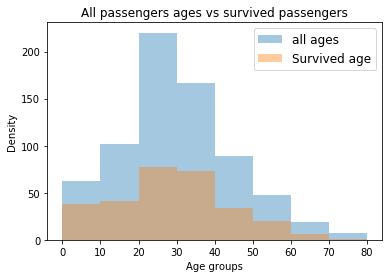

In [10]:
#set bin range on how many age groups there are:
max_age = max(train['Age'])
bin_count = np.linspace(0, max_age, (int(max_age/10)+1))

sns.distplot(train['Age'], bins=bin_count, kde=False, label='all ages')
sns.distplot(survived['Age'], bins=bin_count,  kde=False,label='Survived age')

plt.legend(prop={'size': 12})
plt.title('All passengers ages vs survived passengers')
plt.xlabel('Age groups')
plt.ylabel('Density')

In [30]:
?sns.barplot


You can see here with this overlay of the surviving and non-surviving groups by age that there is a bigger gap between the middle ages compared to the children/teens. This is heavily infavour of our hypothesis, but we can get a more detailed look than this. By seeing the rates (proportions saved) for each age bracket.

   Age group  Survival rate  Group count
0      0 - 5       0.675000           40
1     5 - 10       0.500000           22
2    10 - 15       0.437500           16
3    15 - 20       0.395349           86
4    20 - 25       0.342105          114
5    25 - 30       0.358491          106
6    30 - 35       0.421053           95
7    35 - 40       0.458333           72
8    40 - 45       0.375000           48
9    45 - 50       0.390244           41
10   50 - 55       0.437500           32
11   55 - 60       0.375000           16
12   60 - 65       0.400000           15
13   65 - 70       0.000000            4
14   70 - 75       0.000000            6
15   75 - 80       0.000000            0
16   80 - 85       1.000000            1


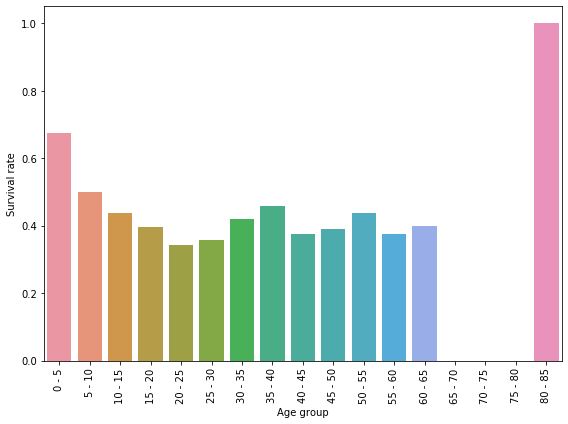

In [40]:
def age_group_plot_and_table(s, t):  
    perc_survived = np.empty(18)
    age_dict = {}
    totals_dict = {}
    #print(perc_survived)
    for i in np.linspace(0, 80, 17):
        #print(i)
        srv = s[(s['Age'] >= i) & (s['Age'] < (i + 5))]
        srv = srv['Age']
        total = t[(t['Age'] >= i) & (t['Age'] < i+5)]
        total = total['Age']

        if len(total.values) != 0:
            age_dict[i]  =  float(len(srv.values)/len(total.values))
            totals_dict[i] = len(total.values)
        else:
            age_dict[i]  =  float(0)
            totals_dict[i] = 0
    
    vals  = ['{} - {}'.format(int(i), int(i+5)) for i in list(age_dict.keys())]
    fig, ax = plt.subplots(figsize=(8, 6))
    df = pd.DataFrame({'Age group': vals, 'Survival rate': list(age_dict.values()), 'Group count':  list(totals_dict.values())})
    
    #sns.distplot(df['Age group'], bins=bin_count, label='survival rate')
    sns.barplot(x = 'Age group', y = 'Survival rate', data = df, ax=ax)
    plt.xticks(rotation=90)
    plt.tight_layout()
    return df 
    
    
df_group_data = age_group_plot_and_table(survived, train)
print(df_group_data.to_string())

Here I've plotted the survival rates by age group, and also the table of these rates - this helps us interpet some extreme results such as the 100% survival rate of the >80 year olds, but we can see that there was only 1 of them, so not a great  sample size for that population!

But through the younger range we can a definite trending towards more survival roughly through the 0-15 years old range.

Now our null hypothesis was that all the rates were actually the same.

So we need to ask the questions:
<ul>
<li>How can we measure this objectively - and not just eyeball this graph (In some other data analysis, the differences in the data might not be so clear cut)  </li>
<li>Using this measure, we can ask, what is the chance these observed differences are down to pure chance and variability?</li>
</ul>


So first, what was the total overall survival rate?


In [42]:
'Now let\'s simulate a group with the same survival rate, but with the assumption that there were no differences between age group survivals'
print('Overall suvival rate {}%'.format(len(train[train['Survived'] == 1])/len(train['Survived'])*100))


Overall suvival rate 38.38383838383838%



So how we will test this, is we will take this data set and create 'Permutation Samples'. The picture below (Curtosy of DataCamps lessons on Statistical thinking) shows an example of this permutation, we take this sample of data, where the red and blue represent 2 different categories (such as young and old people) and these different data categories have some other shared data type (in this picture we can just say some numerical measure).

![Permutation](permutation_example.jpg)

You then jumble up all of these numbers and act as if it is a new sample of the same data population (see a jumbled version below - look at the first row and notice that they are all difference random numbers form the first picture)


![Permutation](permutation_example_jumbled.jpg)

We can then use this new sample to calculate the same statistics as we did on the original data set, such as the survival rates.

So in our original empirical data we believe there are trends in the data that are not simply random (Children with a higher survival rate), but our jumbled data now represents a completely random scenario - in this case we would expect each age group to show a similar survival rate to the original mean of 38% 

In our comparison testing we will actually calculate for these permutations the <b>difference between young and 'the rest' i.e (young_survival_rate - all_older_ages_rate)</b>.
<br />

So next we create a large number of these jummbled data sets (Permutation Samples) and get the difference in survival rates betwen the young and older ages, this gives us a distribution of some of the variation that we might see if we sampled a bunch of identical ships with similar group ages and an assumed equal chance of survival between the ages.  

So now we have arrived where we wanted for the ability to do a significance test between the original data and the data that would represent a world where there is no difference between survival rates betweent he age groups (Our random rates world).

We have our test statistic - the difference in survival rate for the 'young' between 0 and 15 and the 'old' (the rest of the ages).
And we have our data set representing an expected non-biased survival rate (Our distribution of survival rate differences form our permutations).

We can plot thist distribution to get an idea of the range of expected differences. We can then calculate the probability that our original rates difference would land within this distribution. 

That is, the probability of our Alternate hypothesis <b>given</b> our null hypothesis. Or the probability of the survival rate difference that we have oberved, if we assumed that the age groups actually did have an equal chance of survival (as seen in our random world).

This is written probabilistically as:
P($\mu_a$ | $\mu_0$) = 'p-value'



In [46]:
survival_rate =  lambda x: sum(x)/len(x)
#lambda function for rate
def diff_rates(d1, d2):
    #I refrained from getting absolute value just to show that the permutations replicates will be normally distributed
    return (survival_rate(d2) - survival_rate(d1)) 

range_0_to_15 =  train[(train['Age'] >= 0) & (train['Age'] < (15))]
range_gt_or_eq_15 = train[(train['Age'] >= 15)]
#print(range_0_to_15)
#perm_sample1, perm_sample2 = s_tools.permutation_sample(range_0_to_15, range_gt_or_eq_15)

# Take 10,000 bootstrap replicates of the rate: calculating boostrap replicates
perm_replicates = s_tools.draw_perm_reps(range_0_to_15['Survived'], range_gt_or_eq_15['Survived'], diff_rates, size=10000)



Our original difference in survival rate 0.19170295113691332 would be miles off in the right side direction!


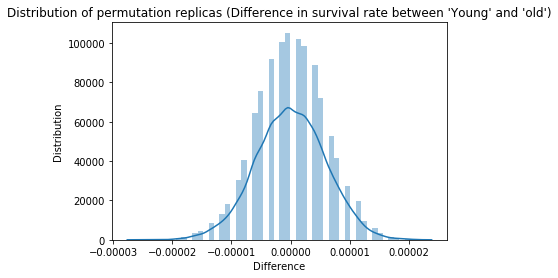

In [49]:

orig_rate =  survival_rate(range_0_to_15['Survived']) - survival_rate(range_gt_or_eq_15['Survived'])
norm_repl_data = np.true_divide(perm_replicates, len(perm_replicates))
sns.distplot(norm_repl_data)

plt.title('Distribution of permutation replicas (Difference in survival rate between \'Young\' and \'old\')')
plt.xlabel('Difference')
plt.ylabel('Distribution')
print('Our original difference in survival rate {} would be miles off in the right side direction!'.format(orig_rate))

So above we can see this distribution of our samples, and of course in a world where everyone has an equal survival rate we would expect this to center around a mean of 0. And if we plotted our original survival rate (0.19), it would be out of the graph far off on the right-hand side. Our statistical test in terms of this graph asks the question, how much proportion of this distribution (in blue on the graph) would be equal to or above our test statistic (the original survival difference). In this case, very little! Because original survival rate is so far to the right and so much bigger a rate than what would be considered a normal rate in our simulated world where we have assumed that all ages have equal survival chance.


In [66]:
# Compute p-value: p
print('Original rate difference {}'.format(orig_rate))
p = np.sum(perm_replicates >= orig_rate) / len(perm_replicates)
# Print the result
print('p-value = {}'.format(p, '.5f'))

Original rate difference 0.19170295113691332
p-value = 0.0007


Calculating that proportion gives us a p-value, and above we can see how low that p-value is, we could have set a specific significance cut of for the p-value such as 0.05, but in this case it is very low and we are satisified with it's significance. 

So in normal language: This is the probability of getting at least a difference in young-old survival rate of '0.19', assuming each age group had an equal chance of survival. 

So given that our probability of a rate of '0.19' is at least 0.0006%, we can safely say that this is a very rare result. So we reject the null hypothesis in favour of the Alternate hypothesis (Young people had higher survival rates), this supports our information that young people were given priorty. 


Now there may be a simpler way to prove this significance, which we will use on the females comparison, but first let's compare it with our previous method on the age difference.

We will use a <b>Binomial test</b> to assess the probability of our observed successes (Surivors), given we would expect there to be a certain survival rate for that age group (the average) 38.38%.

Put simply the Binomial test (for success/failure measures) is run to see if observed test results differ from what was expected. https://www.statisticshowto.com/binomial-test/

Therefore this is perfect to test the number of 'successes' (survivals) that we observed, given that our hypothesis was that everyone has an equal survival chance.

We use the binomial test in the following way:

<b>n</b>: total number of observations (In out case, total number of young persons<br/>
<b>successes</b>: total number of survivals we observed<br/>
<b>probability</b>: the probability that a young person would suvival (We have stated this as the rate 38.38% given our hypothesis) <br />

probability_of_result = binom_test(successes, n, probability)

<b>probability_of_result</b>: This represents the probability of observing that amount of successes given our n and probability.

So after we calculate:

In [62]:
from scipy.stats import binom, binom_test
#get age range 0-15
age_0_to_15 = train[(train['Age'] >= 0) & (train['Age'] < 15)]
survived_count = len(age_0_to_15[age_0_to_15['Survived'] == 1])
n = len(age_0_to_15)
expected_rate_survival = 0.3838 #the average survival for the whole group

In [64]:

successes = survived_count # our question is what is the likelyhood of this number of successes
#so we test that what is the probability of this amount of survival (survival rate woman), given this many trials (number survived) and given the expected probability of survival
prob_of_res = binom_test(successes, n, expected_rate_survival)
print('Probability of observing (probability_of_result) that survival rate in \'young\', given that we expect an equal share of survival:\n {:.10f}'.format(prob_of_res))

Probability of observing (probability_of_result) that survival rate in 'young', given that we expect an equal share of survival:
 0.0006475687


This is good to see, it is very close to our other statistical test which saw a p-value of 0.0007.<br />
Let's plot the distribution and the expected value to get a visual of how our expected value appears...

Text(0.5, 1.0, 'Binomial Distribution')

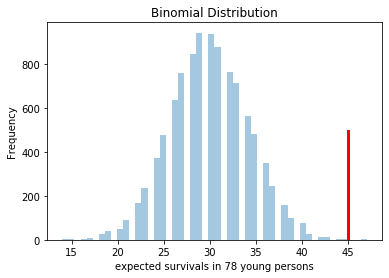

In [67]:
from scipy.stats import binom
#we are testing how likely the observed num of s
data_binom = binom.rvs(n=n, p=expected_rate_survival,size=10000)
#dist  = binom.pmf(successes, len(survived), woman_to_man_ratio)
ax = sns.distplot(data_binom,
                  kde=False)
ax.set(xlabel='expected survivals in {} young persons'.format(n), ylabel='Frequency')
ax.axvline(survived_count, 0,0.5, color='r', linewidth='3')
plt.title('Binomial Distribution')

So here is a very nice visual showing that very little of our probability distribution is equal to or above the survival count that we saw. In this scenario we are essentially observing a sample population (Young) and expecting it's rate to be that of the total popultation (All ages). 

However both our significance test and this visual gives us the clear indication that this group a significantly different survival rate, which we consider to be the result of the priorty given them by those assisting in the survival efforts.

In an accompanying document I will use the binomial testin the same way on the women also. I will do a more alround exploration in future workbooks.